# Task -3 applying learning model for best accuracy


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv('100_Sales.csv')
data.head()

,Region,Country,Item_Type,Sales_Channel,Order_Priority,Ship_Date,Unit_Cost,Total_Revenue,Total_Profit,Unnamed: 9,Unnamed: 10
0,Australia and Oceania,Tuvalu,Baby Food,Offline,H,27/06/2010,159.42,2533654.00,951410.50,NaN,NaN
1,Central America and the Caribbean,Grenada,Cereal,Online,C,15/09/2012,117.11,576782.80,248406.36,NaN,NaN
2,Europe,Russia,Office Supplies,Offline,L,05/08/2014,524.96,1158502.59,224598.75,NaN,NaN
3,Sub_Saharan Africa,Sao Tome and Principe,Fruits,Online,C,07/05/2014,6.92,75591.66,19525.82,NaN,NaN
4,Sub_Saharan Africa,Rwanda,Office Supplies,Offline,L,02/06/2013,524.96,3296425.02,639077.50,NaN,NaN


In [5]:
data.drop(['Unnamed: 9', 'Unnamed: 10'], axis=1, inplace=True)

In [8]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Sample preprocessing steps: encoding categorical columns
label_encoder = LabelEncoder()
data['Region'] = label_encoder.fit_transform(data['Region'])
data['Country'] = label_encoder.fit_transform(data['Country'])
data['Item_Type'] = label_encoder.fit_transform(data['Item_Type'])
data['Sales_Channel'] = label_encoder.fit_transform(data['Sales_Channel'])
data['Order_Priority'] = label_encoder.fit_transform(data['Order_Priority'])

# Handle any missing values (if any)
data.fillna(method='ffill', inplace=True)

# Define features (X) and target (y)
X = data[['Region', 'Country', 'Item_Type', 'Sales_Channel', 'Order_Priority', 'Unit_Cost', 'Total_Revenue']]
y = data['Total_Profit']  # Assuming you want to predict Total_Profit, can be changed to other target column

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# --- Feature Scaling ---
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

<ipython-input-8-0bd38793b2c7>:22: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data.fillna(method='ffill', inplace=True)


In [9]:
from sklearn.tree import DecisionTreeRegressor # Import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

# Define hyperparameters for GridSearchCV
dt_params = {
    'max_depth': [3, 5, 10, 15, None],  # Added 15 for better granularity
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4, 10],  # Added 10 for larger datasets
    'criterion': ['squared_error', 'friedman_mse', 'absolute_error', 'poisson']  # Use regression criteria
}

# GridSearch for Decision Tree using Regressor
dt_grid_search = GridSearchCV(
    DecisionTreeRegressor(random_state=42),  # Changed to DecisionTreeRegressor
    dt_params,
    cv=5,
    scoring='neg_mean_squared_error',  # Use a suitable regression scoring metric
    n_jobs=-1
)

# Fit the grid search
dt_grid_search.fit(X_train_scaled, y_train)

# Best Decision Tree Model
best_dt_model = dt_grid_search.best_estimator_
print("Best parameters for Decision Tree:", dt_grid_search.best_params_)

Best parameters for Decision Tree: {'criterion': 'absolute_error', 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2}


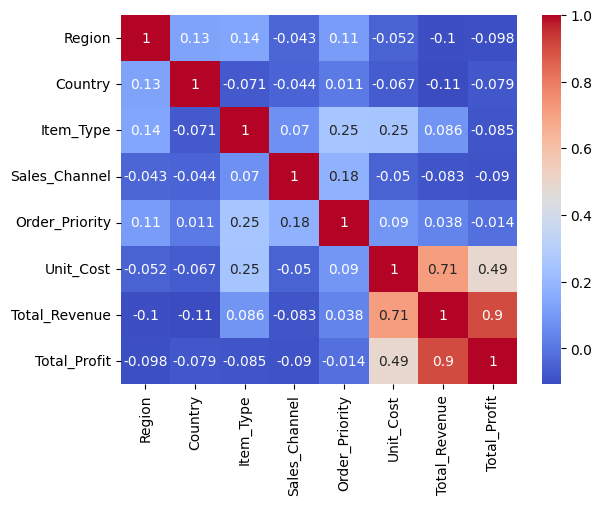

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

corr = X_train.join(y_train).corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()


In [15]:
import pandas as pd

# Use best_rf_model instead of rf_regressor
feature_importances = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': best_rf_model.feature_importances_  # Changed to best_rf_model
}).sort_values(by='Importance', ascending=False)

print(feature_importances)

          Feature  Importance
6   Total_Revenue    0.548569
5       Unit_Cost    0.221665
2       Item_Type    0.088043
1         Country    0.071225
4  Order_Priority    0.029790
0          Region    0.029317
3   Sales_Channel    0.011390


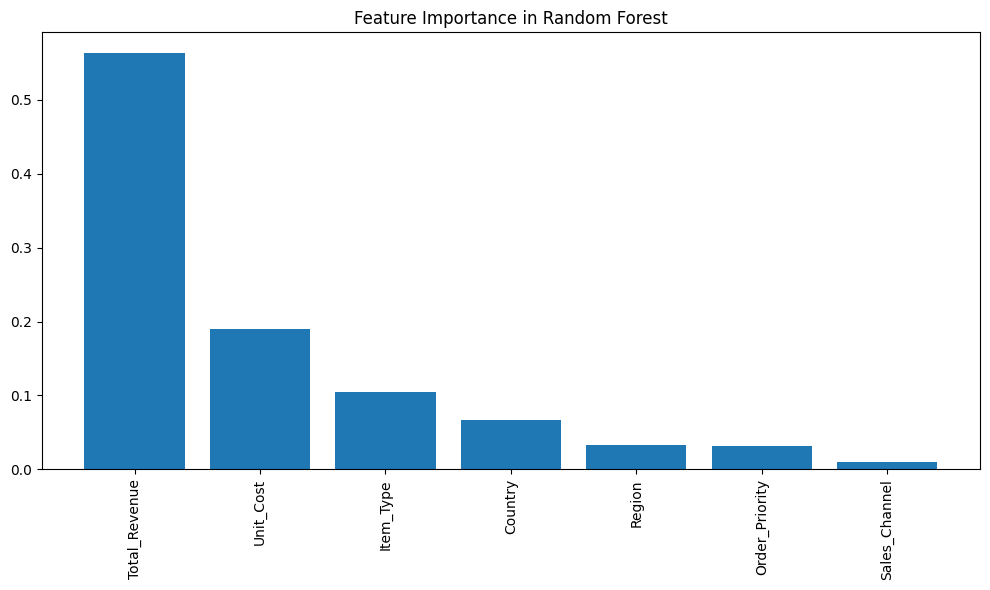

In [ ]:
import matplotlib.pyplot as plt

# Feature importance for Random Forest
importances = best_rf_model.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10, 6))
plt.title("Feature Importance in Random Forest")
plt.bar(range(X_train_scaled.shape[1]), importances[indices], align="center")

feature_names = X_train.columns  # or feature_names = X.columns

plt.xticks(range(X_train_scaled.shape[1]), feature_names[indices], rotation=90)
plt.tight_layout()
plt.show()

In [16]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(
    RandomForestRegressor(random_state=42),
    param_grid,
    cv=5,
    scoring='r2',
    n_jobs=-1
)

grid_search.fit(X_train_scaled, y_train)
print("Best Parameters:", grid_search.best_params_)
print("Best R² Score:", grid_search.best_score_)


Best Parameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Best R² Score: 0.8848734503515209


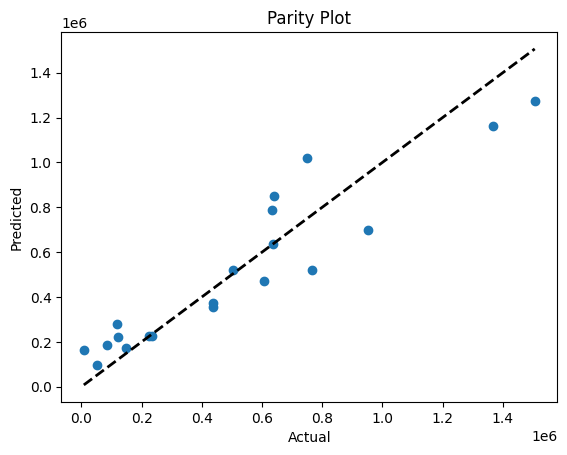

In [23]:
plt.scatter(y_test, y_pred_rf)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.title("Parity Plot")
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.show()


**Thus in end we achieve near to 90% accuracy from random forest and can achieve more if we use ensemble training or XG boost methods**

# Ensemble learning

In [18]:
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import Ridge

stacked_model = StackingRegressor(
    estimators=[
        ('rf', RandomForestRegressor(n_estimators=100, random_state=42)),
        ('dt', DecisionTreeRegressor(random_state=42))
    ],
    final_estimator=Ridge()
)

stacked_model.fit(X_train_scaled, y_train)
stacked_r2 = stacked_model.score(X_test_scaled, y_test)
print("Stacking Model R² Score:", stacked_r2)


Stacking Model R² Score: 0.8752429464415383


# XG Boost

In [19]:
from xgboost import XGBRegressor

xgb_model = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42)
xgb_model.fit(X_train_scaled, y_train)
xgb_r2 = xgb_model.score(X_test_scaled, y_test)
print("XGBoost R² Score:", xgb_r2)


XGBoost R² Score: 0.9144587647506479


In [20]:
import numpy as np

from scipy.stats import zscore

z_scores = np.abs(zscore(y_train))
X_train_cleaned, y_train_cleaned = X_train[z_scores < 3], y_train[z_scores < 3]


In [21]:
import numpy as np

y_train_log = np.log1p(y_train)


# Cross Validation

In [22]:
from sklearn.model_selection import cross_val_score

cv_r2 = cross_val_score(RandomForestRegressor(random_state=42), X_train_scaled, y_train, cv=5, scoring='r2')
print("Cross-Validation R² Scores:", cv_r2)
print("Mean R² Score:", cv_r2.mean())


Cross-Validation R² Scores: [0.95049975 0.75435432 0.87436707 0.91504256 0.92483859]
Mean R² Score: 0.8838204582069767
